In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [5]:
data=pd.read_csv("Titanic_Train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 PassengerId,Name,Ticket We can remove since it is Nominal Data

In [6]:
data=data.drop(["PassengerId"],axis=1)

In [7]:
data=data.drop(["Name"],axis=1)

In [8]:
data=data.drop(["Ticket"],axis=1)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
data["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [11]:
data["Survived"].value_counts() # Binomial data

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
data["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [15]:
data["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [16]:
data["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [17]:
data["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [18]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Handling Missing Values

In [19]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Since there are more than 80 % values as NA in Cabin , we are dropping this column

In [20]:
data=data.drop(["Cabin"],axis=1)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

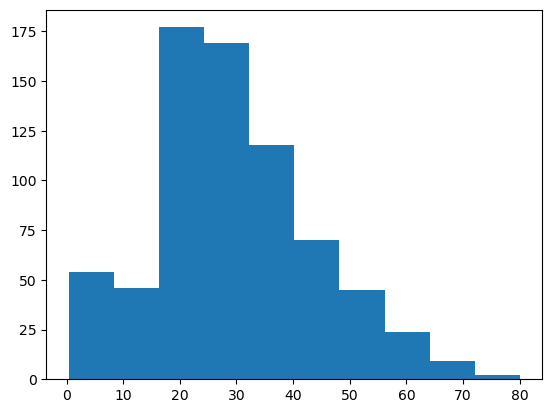

In [23]:
plt.hist(data["Age"])

In [24]:
data["Age"].mean(),data["Age"].median(),data["Age"].mode()

(29.69911764705882,
 28.0,
 0    24.0
 Name: Age, dtype: float64)

Fill Age NA with mode value

In [25]:
data["Age"].fillna(24,inplace=True)

In [26]:
data["Age"].isnull().sum()

0

Drop rows with Embarked as NA 

In [27]:
data["Embarked"].isnull().sum()

2

In [28]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
data.dropna(inplace=True)

Converting Embarked to int

In [30]:
data['Embarked'].replace(['S', 'C','Q'],
                        [0,1,3], inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


### Change Categorical Column Sex to 1/0

In [32]:
data["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [33]:
data['Sex'].replace(['male', 'female'],
                        [1, 0], inplace=True)

In [34]:
data["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


### Splitting X and Y columns

In [36]:
x=data.iloc[:,1:8]
y=data.iloc[:,0]

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [39]:
data.shape

(889, 8)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classification=LogisticRegression()

In [42]:
classification.fit(x,y)

LogisticRegression()

In [43]:
y_pred=classification.predict(x)

In [44]:
y_pred.shape

(889,)

In [45]:
y_yhat=pd.DataFrame({"y":list(y),"y_predicted":classification.predict(x)})

In [46]:
y_yhat

,y,y_predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
884,0,0
885,1,1
886,0,1
887,1,1


In [47]:
len(y_yhat[(y_yhat["y"]==1) & (y_yhat["y_predicted"]==1)])  # True Positive

240

In [48]:
len(y_yhat[(y_yhat["y"]==0) & (y_yhat["y_predicted"]==0)]) # True Negative

467

In [49]:
len(y_yhat[(y_yhat["y"]==1) & (y_yhat["y_predicted"]==0)]) # False Negative

100

In [50]:
len(y_yhat[(y_yhat["y"]==0) & (y_yhat["y_predicted"]==1)]) # False Positive

82

In [51]:
240+467+100+82

889

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
c_m=confusion_matrix(y,y_pred)

In [54]:
c_m

array([[467,  82],
       [100, 240]], dtype=int64)

In [55]:
import seaborn as sns


Text(0.5, 1.0, 'Confusion Matrix')

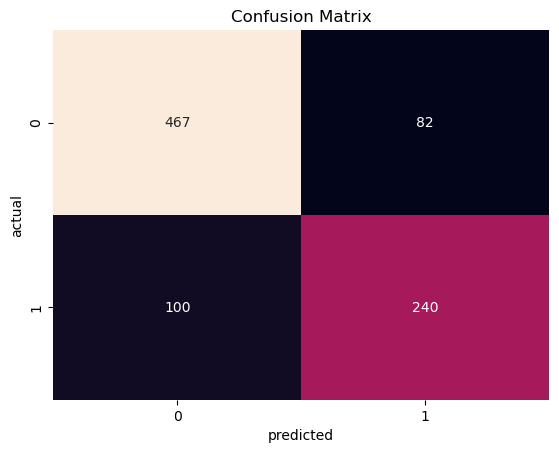

In [56]:
ax=plt.subplot()
sns.heatmap(c_m,annot=True,fmt="g",ax=ax,cbar=False)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("Confusion Matrix")

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.71      0.73       340

    accuracy                           0.80       889
   macro avg       0.78      0.78      0.78       889
weighted avg       0.79      0.80      0.79       889



out of  889 predictions we have 80% good predictions

In [59]:
classification.predict_proba(x)

array([[0.9102135 , 0.0897865 ],
       [0.10327165, 0.89672835],
       [0.38738526, 0.61261474],
       ...,
       [0.46814763, 0.53185237],
       [0.44834009, 0.55165991],
       [0.87676228, 0.12323772]])

### Significance of Features

In [60]:
classification.intercept_

array([4.63671475])

In [61]:
classification.coef_

array([[-1.08060629e+00, -2.60443839e+00, -3.68118206e-02,
        -3.15621620e-01, -6.44752396e-02,  2.59028400e-03,
         1.35108436e-01]])

In [62]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


we can see Pclass and SEX have high significance 

### ROC Curve

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [64]:
fpr,tpr,thresholds=roc_curve(y,classification.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)

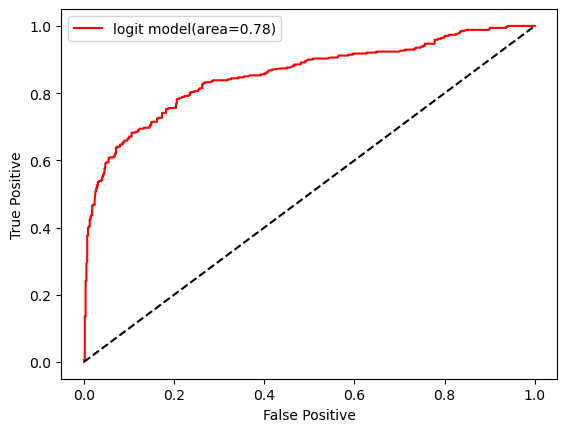

In [65]:
plt.plot(fpr,tpr,color="red",label="logit model(area=%.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

Area under the Curve

In [66]:
auc

0.7782599378549234

In [67]:
data_test=pd.read_csv("Titanic_test.csv")

In [68]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
